In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/akshaikrishna/Desktop/kishore/ratings_Beauty.csv')
df

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [2]:
df.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [3]:
new_df = df.head(40000)
new_df.head

<bound method NDFrame.head of                UserId   ProductId  Rating   Timestamp
0      A39HTATAQ9V7YF  0205616461     5.0  1369699200
1      A3JM6GV9MNOF9X  0558925278     3.0  1355443200
2      A1Z513UWSAAO0F  0558925278     5.0  1404691200
3      A1WMRR494NWEWV  0733001998     4.0  1382572800
4      A3IAAVS479H7M7  0737104473     1.0  1274227200
...               ...         ...     ...         ...
39995  A29CBZL19K31RH  B0000Y3CRY     4.0  1236988800
39996  A35UNON2GI8C0R  B0000Y3CRY     5.0  1377734400
39997  A23UDCZ9M2X1IH  B0000Y3CRY     2.0  1379548800
39998   ADT3I6IN9TMBM  B0000Y3CRY     5.0  1361664000
39999  A1TSBAASUO1E5B  B0000Y3CRY     5.0  1208822400

[40000 rows x 4 columns]>

In [4]:
#To find most popular products 
popular_products = pd.DataFrame(new_df.groupby('ProductId')['Rating'].count())
Top_ratings = popular_products.sort_values('Rating', ascending=False)
Top_ratings.head(50)

,Rating
ProductId,
B00006IV2F,704
B0000632EN,686
B0000CC64W,590
B00005O0MZ,585
B0000530ED,584
B0000AFUTL,558
B00004TUBL,558
B0000536P4,442
B00005A9WP,430


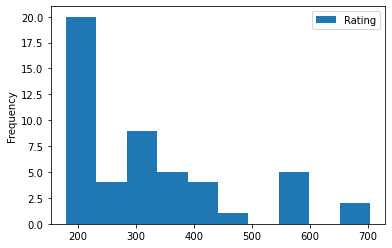

In [5]:
# Visualizing the popular products based on the ratings 
Top_ratings.head(50).plot(kind = "hist")

In [6]:
#import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [7]:
#Creating utility matrix(um) 
noduplicate_df = new_df.drop_duplicates(['UserId', 'ProductId'])
new_df_um = noduplicate_df.pivot_table(values='Rating', index='ProductId', columns='UserId', fill_value=0)
new_df_um.head(15)

UserId,A00205921JHJK5X9LNP42,A00473363TJ8YSZ3YAGG9,A01437583CZ7V02UKZQ5S,A01907982I6OHXDYN5HD6,A020135981U0UNEAE4JV,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A03454732N8VEYJAMGTTH,A03666331WS5WUZMM0AUD,...,AZZDA9BRMPP1B,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZSAMMJPJKJ1,AZZTJQ7CQZUD8,AZZVCBG5G4EV8,AZZWPNME0GQZ2
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304139212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304139220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414089X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414643X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
new_df_um.size

85832720

In [9]:
new_df_um.size

85832720

In [10]:
new_df_um.shape

(2284, 37580)

In [11]:
from scipy.sparse import csr_matrix
new_df_matrix = csr_matrix(new_df_um.values)

from sklearn.neighbors import NearestNeighbors
knnmodel = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knnmodel.fit(new_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [12]:
new_df_matrix

<2284x37580 sparse matrix of type '<class 'numpy.int64'>'
	with 40000 stored elements in Compressed Sparse Row format>

In [532]:
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
q_index = np.random.choice(new_ratings_um.shape[0])
dist, ind = model_knn.kneighbors(new_df_um.iloc[q_index, :].values.reshape(-37580, 37580), n_neighbors = 6)

for i in range(0, len(dist.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(new_df_um.index[q_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, new_df_um.index[ind.flatten()[i]], dist.flatten()[i]))

Recommendations for 9790777884:

1: B000052ZEQ, with distance of 1.0:
2: B000052ZEK, with distance of 1.0:
3: B000052ZEO, with distance of 1.0:
4: B000052ZEI, with distance of 1.0:
5: B000052ZEU, with distance of 1.0:


In [13]:
from sklearn.model_selection import train_test_split
z = pd.to_numeric(new_df['Rating'], downcast='float')
z.values
x = pd.to_numeric(new_df['Timestamp'], downcast='float')
x



0        1.369699e+09
1        1.355443e+09
2        1.404691e+09
3        1.382573e+09
4        1.274227e+09
             ...     
39995    1.236989e+09
39996    1.377734e+09
39997    1.379549e+09
39998    1.361664e+09
39999    1.208822e+09
Name: Timestamp, Length: 40000, dtype: float32

In [14]:

import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, z, test_size=0.4,random_state=109)


In [15]:
X_train = X_train.values
X = X_train.reshape(-1, 1)
X_test = X_test.values
y_train = y_train.values
y = y_train.reshape(-1, 1)
y_test = y_test.values

In [20]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
import collections

In [23]:
classifiers = {
    "KNearest": KNeighborsClassifier()
}

In [24]:
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X , y)
    acc_score = cross_val_score(classifier, X, y, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a accuracy score of", round(acc_score.mean(), 2), "accuracy score")
    print("Classifiers: ", classifier.__class__.__name__, "Has a accuracy score percentage of", round(acc_score.mean(), 2) * 100, " % accuracy percentage")

<ipython-input-24-c6ff6f3167eb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X , y)
/Users/akshaikrishna/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/akshaikrishna/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/akshaikrishna/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when

Classifiers:  KNeighborsClassifier Has a accuracy score of 0.52 accuracy score
Classifiers:  KNeighborsClassifier Has a accuracy score percentage of 52.0  % accuracy percentage


/Users/akshaikrishna/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
